In [31]:
import os
import glob
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [32]:
# Read and merge all cleaned data csv's into a single data frame

csvFiles = glob.glob(os.path.join('./Data/Cleaned', '*.csv'))
df = pd.DataFrame()

for file in csvFiles: 
    if df.empty: df = pd.read_csv(file)
    else: df.merge(pd.read_csv(file))

df

,Unnamed: 0,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,0,Stephen Curry,GSW,33,63,37,26,34.2,32.0,10.4,21.7,48.2,5.3,12.7,42.1,5.7,6.3,91.6,0.5,5.0,5.5,5.8,3.4,1.2,0.1,1.9,47.9,8,0,3.9
1,1,Bradley Beal,WAS,28,60,32,28,35.8,31.3,11.2,23.0,48.5,2.2,6.2,34.9,6.8,7.7,88.9,1.2,3.5,4.7,4.4,3.1,1.2,0.4,2.3,45.0,4,0,-0.1
2,2,Damian Lillard,POR,30,67,39,28,35.8,28.8,9.0,19.9,45.1,4.1,10.5,39.1,6.7,7.2,92.8,0.5,3.7,4.2,7.5,3.0,0.9,0.3,1.5,45.7,16,0,3.0
3,3,Joel Embiid,PHI,27,51,39,12,31.1,28.5,9.0,17.6,51.3,1.1,3.0,37.7,9.2,10.7,85.9,2.2,8.4,10.6,2.8,3.1,1.0,1.4,2.4,49.3,31,0,7.9
4,4,Giannis Antetokounmpo,MIL,26,61,40,21,33.0,28.1,10.3,18.0,56.9,1.1,3.6,30.3,6.5,9.5,68.5,1.6,9.4,11.0,5.9,3.4,1.2,1.2,2.8,53.9,41,7,6.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,448,Nicolo Melli,DAL,30,45,26,19,12.6,3.0,1.0,3.1,32.6,0.5,1.9,27.1,0.4,0.6,76.0,0.6,2.1,2.7,1.0,0.3,0.3,0.1,1.3,8.6,0,0,0.5
393,456,Matthew Dellavedova,CLE,30,13,4,9,17.2,2.8,1.1,4.3,25.0,0.3,1.9,16.0,0.3,0.3,100.0,0.5,1.4,1.8,4.5,0.5,0.3,0.1,1.6,12.4,0,0,-1.4
394,467,KZ Okpala,MIA,22,37,22,15,12.1,2.5,1.0,2.6,37.5,0.3,1.4,24.0,0.2,0.4,53.3,0.6,1.3,1.8,0.5,0.4,0.3,0.3,1.6,6.8,0,0,-1.8
395,474,Wes Iwundu,NOP,26,41,17,24,13.1,2.4,0.8,2.5,33.3,0.1,1.0,12.2,0.6,0.8,83.9,0.4,1.8,2.2,0.4,0.5,0.4,0.1,1.2,6.6,0,0,-2.3


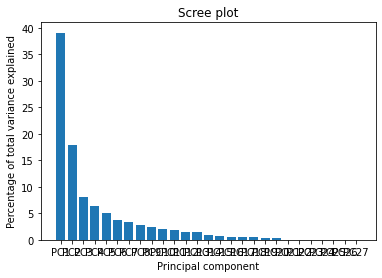

In [33]:
# drop non-numeric and unwanted coloumns
df.drop(["Unnamed: 0", "PLAYER", "TEAM"], axis=1, inplace=True)

# shift data mean to origin and scale variance in each feature to 1
scaledDf = preprocessing.scale(df)

# perform pca
pca = PCA()
pca.fit(scaledDf)
pcaData = pca.transform(scaledDf)

# find percentage of variance accounted for by principal componenets
varPercent = np.round(pca.explained_variance_ratio_ * 100, decimals=1)

# create scree plot
labels = ['PC' + str(i) for i in range(1, len(varPercent) + 1)]

plt.bar(x=labels, height=varPercent)
plt.ylabel('Percentage of total variance explained')
plt.xlabel('Principal component')
plt.title("Scree plot")
plt.show()


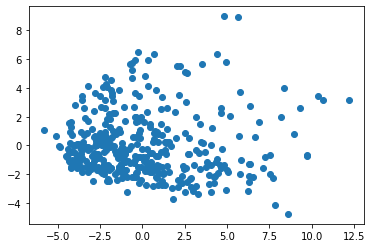

In [34]:
# Principal component plot

pcaDf = pd.DataFrame(pcaData, columns=labels)

plt.scatter(pcaDf.PC1, pcaDf.PC2)
plt.show()